# Лабораторная работа 2

## Полносвязная нейронная сеть

Реализовать нейронную сеть, состоящую из двух полносвязных слоев и решающую задачу классификации на наборе данных из лабораторной работы 1.

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from scripts.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

C:\Users\kisel\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1. Добавьте реализации методов класса TwoLayerNet . Проверьте вашу реализацию на модельных данных (Код приведен ниже).  

In [2]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Прямой проход: вычисление выхода сети

Реализуйте первую часть  метода TwoLayerNet.loss, вычисляющую оценки классов для входных данных. 

Сравните ваш выход сети с эталонными значениями. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-7) .

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()


print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08



# Прямой проход: вычисление loss

Реализуйте вторую часть метода, вычисляющую значение функции потерь. Сравните с эталоном. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-12) .

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Обратный проход

Реализуйте третью часть метода loss. Используйте численную реализацию расчета градиента для проверки вашей реализации обратного прохода.  Если прямой и обратный проходы реализованы верно, то ошибка будет < 1e-8 для каждой из переменных W1, W2, b1, и b2. 


In [5]:
from scripts.gradient_check import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.05)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11


# Обучение нейронной сети на смоделированных данных

Реализуйте методы TwoLayerNet.train и TwoLayerNet.predict. Обучайте сеть до тех пор, пока значение loss не будет < 0.02.


Final training loss:  0.017149607938732093


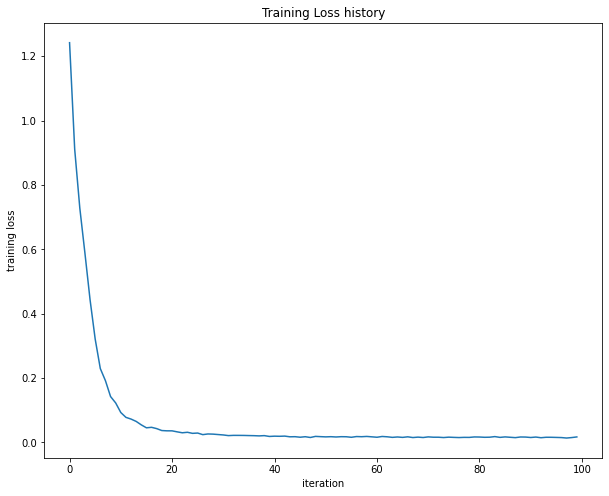

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])


plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Обучение нейронной сети на реальном наборе данных (CIFAR-10, MNIST)

Загрузите набор данных, соответствующий вашему варианту. 

Разделите данные на обучающую, тестовую и валидационную выборки.

Выполните предобработку данных, как в ЛР 1. 

Обучите нейронную сеть на ваших данных. 

При сдаче лабораторной работы объясните значения всех параметров метода train.

In [7]:
digits = load_digits()
# Разделяем данные на признаки и метки классов
X = digits.data
y = digits.target

num_classes = len(set(y))

# Создали словарь, в котором ключи - это классы, значениям - списки индексов соответствующих изображений
class_indices = {i: [] for i in range(num_classes)}
for i, label in enumerate(y):
    class_indices[int(label)].append(i)

# Разделяем данных на обучающую, тестовую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Разворачиваем изображения в массивы размерности 1
X_train_flat = X_train.reshape(len(X_train), -1)
X_val_flat = X_val.reshape(len(X_val), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

print("Размеры обучающей выборки:", X_train_flat.shape)
print("Размеры валидационной выборки:", X_val_flat.shape)
print("Размеры тестовой выборки:", X_test_flat.shape)

Размеры обучающей выборки: (1077, 64)
Размеры валидационной выборки: (360, 64)
Размеры тестовой выборки: (360, 64)


In [8]:
input_size = 8 * 8 * 1 # Изображения у нас 8 x 8, черно-белые
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302594
iteration 100 / 1000: loss 2.302597
iteration 200 / 1000: loss 2.302589
iteration 300 / 1000: loss 2.302586
iteration 400 / 1000: loss 2.302600
iteration 500 / 1000: loss 2.302592
iteration 600 / 1000: loss 2.302593
iteration 700 / 1000: loss 2.302588
iteration 800 / 1000: loss 2.302592
iteration 900 / 1000: loss 2.302593
Validation accuracy:  0.10277777777777777


Используя параметры по умолчанию, вы можете получить accuracy, примерно равный 0.29. 

Проведите настройку гиперпараметров для увеличения accuracy. Поэкспериментируйте со значениями гиперпараметров, например, с количеством скрытых слоев, количеством эпох, скорости обучения и др. Ваша цель - максимально увеличить accuracy полносвязной сети на валидационном наборе. Различные эксперименты приветствуются. Например, вы можете использовать методы для сокращения размерности признакового пространства (например, PCA), добавить dropout слои и др. 

Для лучшей модели вычислите acсuracy на тестовом наборе. 

Для отладки процесса обучения часто помогают графики изменения loss и accuracy в процессе обучения. Ниже приведен код построения таких графиков. 

In [9]:
# Этот код использовался для выявления лучших параметров для модели. Перебирались все комбинации значчений параметров:
# hidden_sizes = [100, 150, 200, 250, 300]
# learning_rates = [0.1, 0.125, 0.15]
# regularization_strengths = [0.01, 0.0125, 0.015]
# learning_rate_decays = [0.9, 0.95, 1]
# num_iterss = [500, 1000, 2000]
# batch_sizes = [200, 400, 600]

# # Инициализация переменных для хранения лучших результатов
# best_val_accuracy = -1
# best_test_accuracy = -1
# best_hyperparams = {}

# # Создание DataFrame для хранения результатов поиска
# df = pd.DataFrame({'hs': [],
#                    'lr': [],
#                    'rs': [],
#                    'lrd': [],
#                    'ni': [],
#                    'bs': [],
#                    'acc': []})
# # Перебор всех комбинаций гиперпараметров
# for hs, lr, reg, lrd, ni, bs in itertools.product(hidden_sizes, learning_rates, regularization_strengths, learning_rate_decays, num_iterss, batch_sizes):
#     # Инициализация и обучение модели с текущими гиперпараметрами
#     net = TwoLayerNet(input_size, hs, num_classes)
#     stats = net.train(X_train, y_train, X_val, y_val,
#                       num_iters=ni, batch_size=bs,
#                       learning_rate=lr, learning_rate_decay=lrd,
#                       reg=reg, verbose=False)

#     # Оценка качества модели на валидационном и тестовом наборах данных
#     val_accuracy = (net.predict(X_val) == y_val).mean()
#     test_accuracy = (net.predict(X_test) == y_test).mean()
#     params = {'hidden_size': hs, 'learning_rate': lr, 'reg': reg, 'learning_rate_decay': lrd, 'num_iters': ni, 'batch_size': bs}

#     # Обновление лучших результатов, если текущая модель лучше
#     if val_accuracy > best_val_accuracy:
#         best_val_accuracy = val_accuracy
#         best_test_accuracy = test_accuracy
#         best_hyperparams = params

#     # Добавление результатов в DataFrame
#     df = df.append({'hs': hs, 'lr': lr, 'rs': reg, 'lrd': lrd, 'ni': ni, 'bs': bs, 'acc': val_accuracy}, ignore_index=True)

# print(df)


In [10]:
# statc = best_stats
# print(best_stats['train_acc_history'])
# print(best_stats['val_acc_history'])

# print(best_hyperparams)

# Лучшие гиперпараметры из всех комбинаций, полученные в ячейке выше:
hidden_size = 250
learning_rate = 0.1
reg = 0.01
learning_rate_decay = 1
num_iters = 2000
batch_size = 600

net = TwoLayerNet(input_size, hidden_size, num_classes)
stats = net.train(X_train, y_train, X_val, y_val,
                  num_iters=num_iters, batch_size=batch_size,
                  learning_rate=learning_rate, learning_rate_decay=learning_rate_decay,
                  reg=reg, verbose=False)

# Оценки качества на валидационном и тестовом наборах данных
val_accuracy = (net.predict(X_val) == y_val).mean()
test_accuracy = (net.predict(X_test) == y_test).mean()

print(f"val accuracy = {val_accuracy}")
print(f"test accuracy = {test_accuracy}")

val accuracy = 0.9888888888888889
test accuracy = 0.975


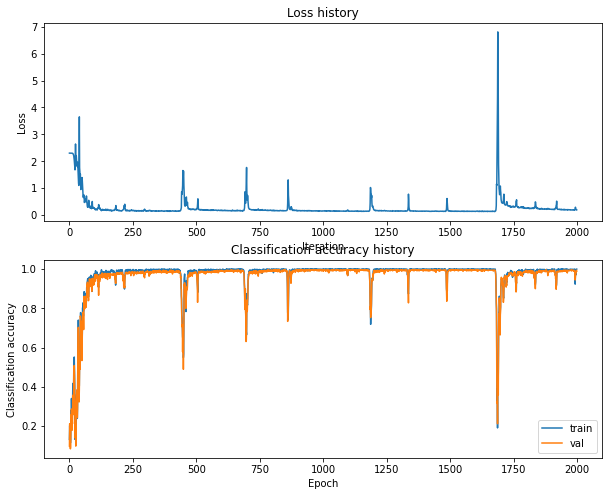

In [11]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

(64, 250)


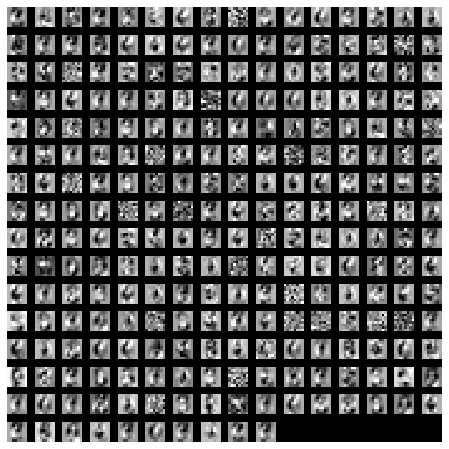

In [12]:
from scripts.vis_utils import visualize_grid

def show_net_weights(net):
    W1 = net.params['W1']
    print(W1.shape)
    W1 = W1.reshape(8, 8, 1, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

Сделайте выводы по результатам работы. 

- Все задания выполнены успешно.
- На тестовых данных достигнут результат с точностью около 0.97.
- Для определения оптимального набора параметров было необходимо протестировать большое количество комбинаций, что заняло значительное время (примерно 1200 комбинаций было проверено за примерно 2 часа).
- Лучшее значение метрики было достигнуто с параметрами: 'hidden_size': 250, 'learning_rate': 0.1, 'reg': 0.01, 'learning_rate_decay': 1, 'num_iters':2000, 'batch_size': 600.